In [1]:
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib import cm
from os.path import join

In [2]:
input_folder_chloro = "C:/Users/Admin/Downloads/NOAA/2022"
files_chloro = os.listdir(input_folder_chloro)

In [3]:
viz_file_chloro = join(input_folder_chloro, files_chloro[0]) # Plotting just the first file
ds_chloro = xr.open_dataset(viz_file_chloro)

In [4]:
ds_chloro

<xarray.Dataset>
Dimensions:    (time: 1, altitude: 1, latitude: 511, longitude: 457)
Coordinates:
  * time       (time) datetime64[ns] 2022-01-01T12:00:00
  * altitude   (altitude) float64 0.0
  * latitude   (latitude) float32 50.04 49.96 49.88 49.79 ... 7.708 7.625 7.542
  * longitude  (longitude) float32 -98.04 -97.96 -97.88 ... -60.21 -60.12 -60.04
Data variables:
    chlor_a    (time, altitude, latitude, longitude) float32 ...
Attributes: (12/62)
    _lastModified:                             2023-02-12T20:30:07.000Z
    cdm_data_type:                             Grid
    Conventions:                               CF-1.6 ACDD-1.3, COARDS
    creator_email:                             coastwatch.info@noaa.gov
    creator_name:                              NOAA CoastWatch
    creator_type:                              institution
    ...                                        ...
    temporal_range:                            daily
    testOutOfDate:                             now-23days
    time_coverage_end:                         2022-01-01T12:00:00Z
    time_coverage_start:                       2022-01-01T12:00:00Z
    title:                                     Chlorophyll (Gap-filled DINEOF...
    Westernmost_Easting:                       -98.041664

In [5]:
lats_chloro = ds_chloro.latitude.data
lons_chloro = ds_chloro.longitude.data
extent_chloro = (lons_chloro.min(), lons_chloro.max(), lats_chloro.min(), lats_chloro.max())

In [6]:
input_folder_ssh = "C:/Users/Admin/Downloads/AVISO/2022"
date_str = "SSH_2022"
viz_file_ssh = join(input_folder_ssh,F"{date_str}.nc")
ds_ssh = xr.open_dataset(viz_file_ssh)

In [7]:
ds_ssh

<xarray.Dataset>
Dimensions:    (time: 151, latitude: 100, longitude: 118)
Coordinates:
  * latitude   (latitude) float32 13.62 13.88 14.12 14.38 ... 37.88 38.12 38.38
  * time       (time) datetime64[ns] 2022-01-01 2022-01-02 ... 2022-05-31
  * longitude  (longitude) float32 -93.62 -93.38 -93.12 ... -64.88 -64.62 -64.38
Data variables:
    ugos       (time, latitude, longitude) float64 ...
    vgos       (time, latitude, longitude) float64 ...
    vgosa      (time, latitude, longitude) float64 ...
    crs        int32 ...
    err_vgosa  (time, latitude, longitude) float64 ...
    sla        (time, latitude, longitude) float64 ...
    ugosa      (time, latitude, longitude) float64 ...
    flag_ice   (time, latitude, longitude) float64 ...
    adt        (time, latitude, longitude) float64 ...
    err_ugosa  (time, latitude, longitude) float64 ...
    err_sla    (time, latitude, longitude) float64 ...
Attributes: (12/45)
    Conventions:                                    CF-1.6
    FROM_ORIGINAL_FILE__Metadata_Conventions:       Unidata Dataset Discovery...
    cdm_data_type:                                  Grid
    comment:                                        Sea Surface Height measur...
    contact:                                        servicedesk.cmems@mercato...
    creator_email:                                  servicedesk.cmems@mercato...
    ...                                             ...
    time_coverage_duration:                         P1D
    time_coverage_end:                              2022-06-23T12:00:00Z
    time_coverage_resolution:                       P1D
    time_coverage_start:                            2022-06-22T12:00:00Z
    title:                                          DT merged all satellites ...
    _CoordSysBuilder:                               ucar.nc2.dataset.conv.CF1...

In [8]:
lats_ssh = ds_ssh.latitude.data
lons_ssh = ds_ssh.longitude.data
extent_ssh = (lons_ssh.min(), lons_ssh.max(), lats_ssh.min(), lats_ssh.max())

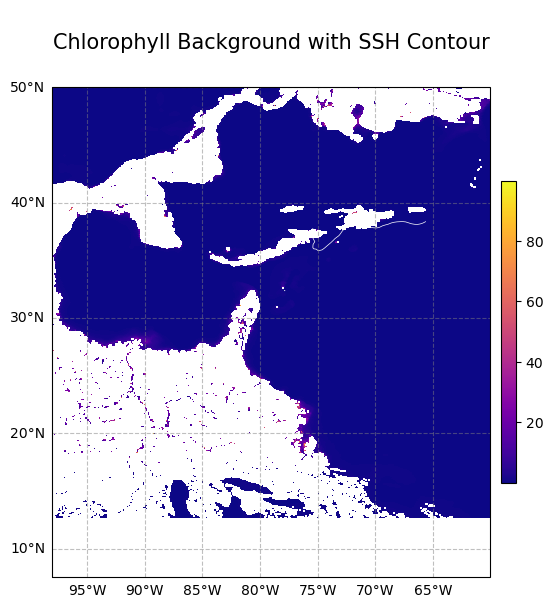

In [9]:
fig, ax = plt.subplots(1,1, figsize = (6,6), subplot_kw={'projection': ccrs.PlateCarree()})
im = ax.imshow(ds_chloro.chlor_a[0,:,:].squeeze(), cmap=cm.plasma, origin='lower', extent=extent_chloro)
ax.contour(lons_ssh, lats_ssh, ds_ssh.adt[0,:,:], origin='lower', extent=extent_ssh, levels=range(-100,100,10), colors='white', linewidths=0.5)
plt.colorbar(im, shrink=.6, pad=.02)
gl = ax.gridlines(draw_labels=True, color='grey', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
plt.title(f"\nChlorophyll Background with SSH Contour\n", size = 15)
plt.tight_layout()
plt.show()